# Meachine Learning

### 1. 監督式學習(Supervised Learning)
###### 定義：給予已標籤(Annotation)的資料來引導NN學習。其應用包含回歸、分類、目標檢測(Object Detection)、影像分割(Image Segmentation)和語音辨識(Speech Recognition)等。  
ex. 最鄰近法(k-Nearest Neighbors, KNN)、決策樹(Decision Trees)、隨機森林(Random Forests)、支援向量機(Support Vector Machines, SVM)及深度神經網路(Deep Neural Networks, DNN)
### 2. 非監督式學習(Unsupervised Learning)  
###### 定義：只有訓練資料，沒有標籤資料。常見的任務有「聚類(Clustering)」和「降維(Dimensionality reduction)」。
###### 聚類(Clustering)：量測資料間的相似度，將性質相同的特徵會聚在一起，來達到自動分群。例如：Google蒐集全世界的新聞，並依國際、商業、科技等內容分類。
ex. k-平均演算法(k-Means)、分級聚類算法(Hierarchical Cluster Analysis, HCA)
###### 降維(Dimensionality reduction)：保持資料的結構以及特徵，將資料簡化。
ex. 主成分分析(Principal Component Analysis, PCA)、核主成分分析(Kernel PCA)、自編碼(Autoencoder)
### 3. 半監督式學習(Semi-supervised Learning)
###### 定義：通常資料擁有大量未標記的資料和少量標記的資料，所以大多數的半監督式學習是由監督式學習和非監督式學習組合。
ex. 將照片上傳到Google相簿，相簿會自動將人物自動分類，讓看起來相似的歸類在一起，而我們只需要把聚類相同的相簿貼上標籤，這樣之後搜尋標籤，相似的照片就會出現。
### 4. 增強式學習(Reinforcement Learning)
###### 定義：指的是電腦透過與一個動態(dynamic)環境不斷重複地互動，來學習正確地執行一項任務。
ex. AlphaGo

# 二元分類問題
### Logistic Regression
#### 第二章所講的回歸(Regression)是指線性回歸，與邏輯回歸(Logistic Regression)不同。線性回歸是用來預測一連續的數值，邏輯回歸是用來分類。
### Sigmoid
#### Sigmoid是指激勵函數(Activation Function)， 但會有梯度消失的問題，原因在於Sigmoid在反向傳播時，梯度會越來越小，最後會無法訓練。所以Sigmoid並不會用在隱藏層，只會出現在輸出層，像二元分類問題都會加上Sigmoid函數。Sigmoid的輸出介於0至1間(0和1分別表示兩個類別)，其函數像"S"，所以又稱 S 函數。
#### f(y') = 1 / ( 1 + e^(-y') )
### Binary Cross-Entropy
#### Cross-Entropy(CE)與 MSE 是常見的 LF。如果是回歸問題，通常會使用MSE；是分類問題，則會使用CE。
#### CE = -( Σ(i=1,N) Σ(j=0,C) y(i,j) log(y'(i,j) / N )
#### y ：預期輸出。
#### y'：預測輸出。
#### C：類別數量。
#### N：一個批次的數量。
#### Binary Cross-Entropy是Sigmoid和CE的組合。所以BCE訓練會使預測輸出逼近0或1。
### One-hot Encoding
#### 獨熱編碼(One-hot Encoding)是將類別以0或1的表示方法，
|  類別   | 數值表示  |  One-hot Encoding  |
|  :----: | :----:   | :---------------:  |
|  人     |     0    |        001         |
|  狗     |     1    |        010         |
|  貓     |     2    |        100         |

# 實驗：精靈寶可夢對戰預測

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [10]:
# 讀取寶可夢的資料
pokemon_df = pd.read_csv('./Datasets/Ch3/pokemon.csv')
pokemon_df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [11]:
pokemon_df.shape

(800, 12)

In [12]:
pokemon_df = pokemon_df.set_index("#") # 將 "#" 設為索引
pokemon_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [13]:
# 讀取寶可夢對戰資料
combats_df = pd.read_csv('./Datasets/Ch3/combats.csv')
combats_df.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [14]:
# 查看各類別是否有缺失，如下：Name缺1，Type2缺386
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 800
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        799 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   HP          800 non-null    int64 
 4   Attack      800 non-null    int64 
 5   Defense     800 non-null    int64 
 6   Sp. Atk     800 non-null    int64 
 7   Sp. Def     800 non-null    int64 
 8   Speed       800 non-null    int64 
 9   Generation  800 non-null    int64 
 10  Legendary   800 non-null    bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 69.5+ KB


In [15]:
# 查看Type2各屬性的數量，dropna=False可將NaN考慮進去
pokemon_df['Type 2'].value_counts(dropna=False)

NaN         386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Rock         14
Water        14
Ghost        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

In [16]:
# 填補缺失的資料
pokemon_df['Type 2'].fillna('empty', inplace=True)
pokemon_df['Type 2'].value_counts()

empty       386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Rock         14
Water        14
Ghost        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

In [17]:
print(combats_df.dtypes)
print('-' * 30)
print(pokemon_df.dtypes)

First_pokemon     int64
Second_pokemon    int64
Winner            int64
dtype: object
------------------------------
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object


In [19]:
# 將Type 1和Type 2型別轉為 category(類別)，之後可用cat.codes方法轉為數值表示
pokemon_df['Type 1'] = pokemon_df['Type 1'].astype('category')
pokemon_df['Type 2'] = pokemon_df['Type 2'].astype('category')
# 將Legendary型別轉為int
pokemon_df['Legendary'] = pokemon_df['Legendary'].astype('int64')
print(pokemon_df.dtypes)

Name            object
Type 1        category
Type 2        category
HP               int64
Attack           int64
Defense          int64
Sp. Atk          int64
Sp. Def          int64
Speed            int64
Generation       int64
Legendary        int64
dtype: object


In [21]:
# 將Type 1和Type 2轉為One-hot Encoding表示
df_type1_one_hot = pd.get_dummies(pokemon_df['Type 1']) # get_dummies()可直接取得
df_type1_one_hot.head()

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
#,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [22]:
df_type2_one_hot = pd.get_dummies(pokemon_df['Type 2']) # get_dummies()可直接取得
df_type2_one_hot.head()

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [23]:
# 合併兩 Type
combine_df_one_hot = df_type1_one_hot.add(df_type2_one_hot, fill_value=0).astype('int64')
pd.options.display.max_columns = 30

pokemon_df = pokemon_df.join(combine_df_one_hot)
pokemon_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,Charmander,Fire,empty,39,52,43,60,50,65,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [24]:
dict(enumerate(pokemon_df['Type 2'].cat.categories))

{0: 'Bug',
 1: 'Dark',
 2: 'Dragon',
 3: 'Electric',
 4: 'Fairy',
 5: 'Fighting',
 6: 'Fire',
 7: 'Flying',
 8: 'Ghost',
 9: 'Grass',
 10: 'Ground',
 11: 'Ice',
 12: 'Normal',
 13: 'Poison',
 14: 'Psychic',
 15: 'Rock',
 16: 'Steel',
 17: 'Water',
 18: 'empty'}

In [25]:
# 查看屬性對應的編碼
pokemon_df['Type 2'].cat.codes.head(10)

#
1     13
2     13
3     13
4     13
5     18
6     18
7      7
8      2
9      7
10    18
dtype: int8

In [26]:
pokemon_df['Type 1'] = pokemon_df['Type 1'].cat.codes
pokemon_df['Type 2'] = pokemon_df['Type 2'].cat.codes
pokemon_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,9,13,45,49,49,65,65,45,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,Ivysaur,9,13,60,62,63,80,80,60,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,Venusaur,9,13,80,82,83,100,100,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,Mega Venusaur,9,13,80,100,123,122,120,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,Charmander,6,18,39,52,43,60,50,65,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [27]:
# 由於 Name 用不到，故刪除
pokemon_df.drop('Name', axis='columns', inplace=True)
pokemon_df.head()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,9,13,45,49,49,65,65,45,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,9,13,60,62,63,80,80,60,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,9,13,80,82,83,100,100,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,9,13,80,100,123,122,120,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,6,18,39,52,43,60,50,65,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [28]:
# 將寶可夢勝利的一方改為0與1
combats_df['Winner'] = combats_df.apply(lambda x:0
                                        if x.Winner == x.First_pokemon else 1,
                                        axis='columns'
                                       )
combats_df.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,1
1,702,701,1
2,191,668,1
3,237,683,1
4,151,231,0


In [29]:
# 分割訓練集
data_num = combats_df.shape[0]
print("總筆數{}".format(data_num))
indexes = np.random.permutation(data_num)
print("indexes: {}".format(indexes))
# Train：Valid：Test = 6：2：2
train_indexes = indexes[:int(data_num * 0.6)]
valid_indexes = indexes[int(data_num * 0.6):int(data_num * 0.8)]
test_indexes = indexes[int(data_num * 0.8):]
# 取出資料
train_data = combats_df.loc[train_indexes]
valid_data = combats_df.loc[valid_indexes]
test_data = combats_df.loc[test_indexes]

總筆數50000
indexes: [28730 46796 47073 ...  6732 10577 39630]


In [30]:
# 標準化
pokemon_df['Type 1'] = pokemon_df['Type 1'] / 19
pokemon_df['Type 2'] = pokemon_df['Type 2'] / 19
mean = pokemon_df.loc[:, 'HP':'Generation'].mean()
std = pokemon_df.loc[:, 'HP':'Generation'].std()
pokemon_df.loc[:, 'HP':'Generation'] = (pokemon_df.loc[:, 'HP':'Generation'] - mean) / std
pokemon_df.head()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.473684,0.684211,-0.950032,-0.924328,-0.796655,-0.238981,-0.248033,-0.801002,-1.398762,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0.473684,0.684211,-0.362595,-0.523803,-0.347700,0.219422,0.290974,-0.284837,-1.398762,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,0.473684,0.684211,0.420654,0.092390,0.293665,0.830626,1.009651,0.403383,-1.398762,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,0.473684,0.684211,0.420654,0.646964,1.576395,1.502951,1.728328,0.403383,-1.398762,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,0.315789,0.947368,-1.185007,-0.831899,-0.989065,-0.391782,-0.787041,-0.112782,-1.398762,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [31]:
# 建立Numpy Array格式的訓練資料
x_train_index = np.array(train_data.drop('Winner', axis='columns')) # 對戰中，每個寶可夢的能力值索引
x_valid_index = np.array(valid_data.drop('Winner', axis='columns'))
x_test_index = np.array(test_data.drop('Winner', axis='columns'))
print(x_train_index)

[[666 310]
 [626 148]
 [714 463]
 ...
 [375 344]
 [795 395]
 [ 18 153]]


In [45]:
# 訓練目標
y_train = np.array(train_data['Winner'])
y_valid = np.array(valid_data['Winner'])
y_test = np.array(test_data['Winner'])
print(y_valid.shape)

(10000,)


# 這裡準備兩種不同的輸入資料

### 第一種：寶可夢的屬性為數值表示

In [33]:
pokemon_data_normal = np.array(pokemon_df.loc[:, :'Legendary'])
print(pokemon_data_normal.shape)
# 通過前面的索引產生資料
x_train_normal = pokemon_data_normal[x_train_index - 1].reshape((-1, 20)) # 這裡會是20原因在於這裡是由兩支寶可夢對戰數據
x_valid_normal = pokemon_data_normal[x_valid_index - 1].reshape((-1, 20))
x_test_normal = pokemon_data_normal[x_test_index - 1].reshape((-1, 20))
print(x_train_normal.shape)

(800, 10)
(30000, 20)


### 第二種：寶可夢的屬性為One-hot Encoding

In [47]:
pokemon_data_one_hot = np.array(pokemon_df.loc[:, 'HP':])
print(pokemon_data_one_hot.shape)
# 通過前面的索引產生資料
x_train_one_hot = pokemon_data_one_hot[x_train_index - 1].reshape((-1, 54))
x_valid_one_hot = pokemon_data_one_hot[x_valid_index - 1].reshape((-1, 54))
x_test_one_hot = pokemon_data_one_hot[x_test_index - 1].reshape((-1, 54))
print(x_train_one_hot.shape)

(800, 27)
(30000, 54)


# Model_1

In [39]:
# 建立模型
model_1 = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(20,)), 
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1344      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                1

In [41]:
# 設定Optimizer、Loss Function、Metrics Function
model_1.compile(keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(),
              metrics=[keras.metrics.BinaryAccuracy()]
             )

model_dir = './models/Ch3'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# 設定回調函數
log_dir = os.path.join('./models/Ch3', 'model-1')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-1.h5',
                                             monitor='val_binary_accuracy',
                                             save_best_only=True,
                                             mode='max'
                                            )
history = model_1.fit(x_train_normal, y_train,
                    batch_size=256,
                    epochs=200,
                    validation_data=(x_valid_normal, y_valid),
                    callbacks=[model_cbk, model_mckp]
                   )

Epoch 1/200
  1/118 [..............................] - ETA: 0s - loss: 0.7176 - binary_accuracy: 0.4883WARNING:tensorflow:From C:\Users\a7032\AI_Deep_Learing\Tensorflow2\tf2\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
118/118 [==============================] - 0s 4ms/step - loss: 0.5364 - binary_accuracy: 0.7265 - val_loss: 0.3428 - val_binary_accuracy: 0.8872
Epoch 2/200
118/118 [==============================] - 0s 2ms/step - loss: 0.3956 - binary_accuracy: 0.8610 - val_loss: 0.3058 - val_binary_accuracy: 0.9113
Epoch 3/200
118/118 [==============================] - 0s 2ms/step - loss: 0.3569 - binary_accuracy: 0.8834 - val_loss: 0.2681 - val_binary_accuracy: 0.9261
Epoch 4/200
118/118 [==============================] - 0s 2ms/step - loss: 0.3169 - binary_accuracy: 0.8977 - val_loss: 0.2285 - val_b

Epoch 49/200
118/118 [==============================] - 0s 2ms/step - loss: 0.1724 - binary_accuracy: 0.9455 - val_loss: 0.1569 - val_binary_accuracy: 0.9525
Epoch 50/200
118/118 [==============================] - 0s 2ms/step - loss: 0.1729 - binary_accuracy: 0.9447 - val_loss: 0.1578 - val_binary_accuracy: 0.9499
Epoch 51/200
118/118 [==============================] - 0s 2ms/step - loss: 0.1724 - binary_accuracy: 0.9447 - val_loss: 0.1585 - val_binary_accuracy: 0.9518
Epoch 52/200
118/118 [==============================] - 0s 2ms/step - loss: 0.1719 - binary_accuracy: 0.9461 - val_loss: 0.1597 - val_binary_accuracy: 0.9511
Epoch 53/200
118/118 [==============================] - 0s 2ms/step - loss: 0.1696 - binary_accuracy: 0.9468 - val_loss: 0.1588 - val_binary_accuracy: 0.9511
Epoch 54/200
118/118 [==============================] - 0s 2ms/step - loss: 0.1701 - binary_accuracy: 0.9448 - val_loss: 0.1572 - val_binary_accuracy: 0.9516
Epoch 55/200
118/118 [==============================

Epoch 101/200
118/118 [==============================] - 0s 2ms/step - loss: 0.1579 - binary_accuracy: 0.9487 - val_loss: 0.1523 - val_binary_accuracy: 0.9526
Epoch 102/200
118/118 [==============================] - 0s 2ms/step - loss: 0.1636 - binary_accuracy: 0.9473 - val_loss: 0.1521 - val_binary_accuracy: 0.9539
Epoch 103/200
118/118 [==============================] - 0s 2ms/step - loss: 0.1605 - binary_accuracy: 0.9483 - val_loss: 0.1560 - val_binary_accuracy: 0.9522
Epoch 104/200
118/118 [==============================] - 0s 2ms/step - loss: 0.1604 - binary_accuracy: 0.9482 - val_loss: 0.1516 - val_binary_accuracy: 0.9519
Epoch 105/200
118/118 [==============================] - 0s 2ms/step - loss: 0.1588 - binary_accuracy: 0.9481 - val_loss: 0.1547 - val_binary_accuracy: 0.9527
Epoch 106/200
118/118 [==============================] - 0s 2ms/step - loss: 0.1579 - binary_accuracy: 0.9488 - val_loss: 0.1551 - val_binary_accuracy: 0.9512
Epoch 107/200
118/118 [=======================

# Model_2

In [42]:
# 建立模型
model_2 = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(54,)), 
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                3520      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 16)               

In [48]:
# 設定Optimizer、Loss Function、Metrics Function
model_2.compile(keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(),
              metrics=[keras.metrics.BinaryAccuracy()]
             )

model_dir = './models/Ch3'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# 設定回調函數
log_dir = os.path.join('./models/Ch3', 'model-2')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-2.h5',
                                             monitor='val_binary_accuracy',
                                             save_best_only=True,
                                             mode='max'
                                            )
history_2 = model_2.fit(x_train_one_hot, y_train,
                    batch_size=256,
                    epochs=200,
                    validation_data=(x_valid_one_hot, y_valid),
                    callbacks=[model_cbk, model_mckp]
                   )

Epoch 1/200
118/118 [==============================] - 0s 4ms/step - loss: 0.3985 - binary_accuracy: 0.8519 - val_loss: 0.3159 - val_binary_accuracy: 0.8996
Epoch 2/200
118/118 [==============================] - 0s 3ms/step - loss: 0.3540 - binary_accuracy: 0.8778 - val_loss: 0.2820 - val_binary_accuracy: 0.9100
Epoch 3/200
118/118 [==============================] - 0s 2ms/step - loss: 0.3233 - binary_accuracy: 0.8915 - val_loss: 0.2368 - val_binary_accuracy: 0.9186
Epoch 4/200
118/118 [==============================] - 0s 2ms/step - loss: 0.2955 - binary_accuracy: 0.8989 - val_loss: 0.2105 - val_binary_accuracy: 0.9237
Epoch 5/200
118/118 [==============================] - 0s 2ms/step - loss: 0.2661 - binary_accuracy: 0.9070 - val_loss: 0.1965 - val_binary_accuracy: 0.9282
Epoch 6/200
118/118 [==============================] - 0s 2ms/step - loss: 0.2539 - binary_accuracy: 0.9103 - val_loss: 0.1864 - val_binary_accuracy: 0.9305
Epoch 7/200
118/118 [==============================] - 0s 

118/118 [==============================] - 0s 2ms/step - loss: 0.0862 - binary_accuracy: 0.9670 - val_loss: 0.1024 - val_binary_accuracy: 0.9625
Epoch 103/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0873 - binary_accuracy: 0.9661 - val_loss: 0.0989 - val_binary_accuracy: 0.9626
Epoch 104/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0892 - binary_accuracy: 0.9646 - val_loss: 0.1020 - val_binary_accuracy: 0.9626
Epoch 105/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0881 - binary_accuracy: 0.9657 - val_loss: 0.1004 - val_binary_accuracy: 0.9636
Epoch 106/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0870 - binary_accuracy: 0.9651 - val_loss: 0.1003 - val_binary_accuracy: 0.9615
Epoch 107/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0881 - binary_accuracy: 0.9649 - val_loss: 0.1043 - val_binary_accuracy: 0.9623
Epoch 108/200
118/118 [==============================] - 0s 

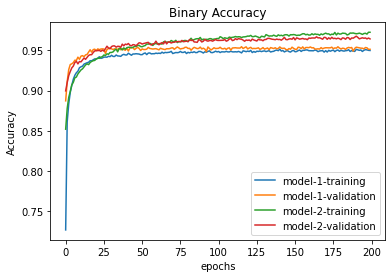

In [53]:
plt.plot(history.history['binary_accuracy'], label='model-1-training')
plt.plot(history.history['val_binary_accuracy'], label='model-1-validation')
plt.plot(history_2.history['binary_accuracy'], label='model-2-training')
plt.plot(history_2.history['val_binary_accuracy'], label='model-2-validation')
plt.title('Binary Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [55]:
model_1 = keras.models.load_model('./models/Ch3/Best-model-1.h5')
model_2 = keras.models.load_model('./models/Ch3/Best-model-2.h5')
loss_1, acc_1 = model_1.evaluate(x_test_normal, y_test)
loss_2, acc_2 = model_2.evaluate(x_test_one_hot, y_test)
print("Model-1：{}%\nModel-2：{}%".format(acc_1, acc_2))

313/313 [==============================] - 0s 979us/step - loss: 0.1102 - binary_accuracy: 0.9657
Model-1：0.9505000114440918%
Model-2：0.9656999707221985%


# 寶可夢PK
### 妙蛙花: 3、噴火龍: 7、水箭龜: 12

In [56]:
green = np.expand_dims(pokemon_data_one_hot[3], axis=0)
red = np.expand_dims(pokemon_data_one_hot[7], axis=0)
blue = np.expand_dims(pokemon_data_one_hot[12], axis=0)

In [59]:
# 妙蛙花 vs 噴火龍
pred_1 = model_2.predict(np.concatenate([green, red], axis=-1))
winner_1 = '妙蛙花' if pred_1 < 0.5 else '噴火龍'
print('pred_1: {}, {}勝'.format(pred_1, winner_1))
# 妙蛙花 vs 水箭龜
pred_2 = model_2.predict(np.concatenate([green, blue], axis=-1))
winner_2 = '妙蛙花' if pred_2 < 0.5 else '水箭龜'
print('pred_2: {}, {}勝'.format(pred_2, winner_2))
# 水箭龜 vs 噴火龍
pred_3 = model_2.predict(np.concatenate([blue, red], axis=-1))
winner_3 = '水箭龜' if pred_3 < 0.5 else '噴火龍'
print('pred_3: {}, {}勝'.format(pred_3, winner_3))

pred_1: [[0.9999808]], 噴火龍勝
pred_2: [[0.0468065]], 妙蛙花勝
pred_3: [[0.9996037]], 噴火龍勝
